In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [2]:
data = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [5]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
le = LabelEncoder()
data['species']=le.fit_transform(data['species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.00,-0.11,0.87,0.82,0.78
sepal_width,-0.11,1.00,-0.42,-0.36,-0.42
petal_length,0.87,-0.42,1.00,0.96,0.95
petal_width,0.82,-0.36,0.96,1.00,0.96
species,0.78,-0.42,0.95,0.96,1.00


<AxesSubplot:>

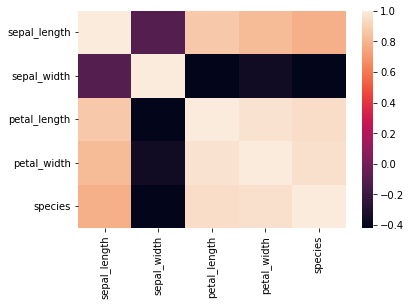

In [9]:
sns.heatmap(data.corr())

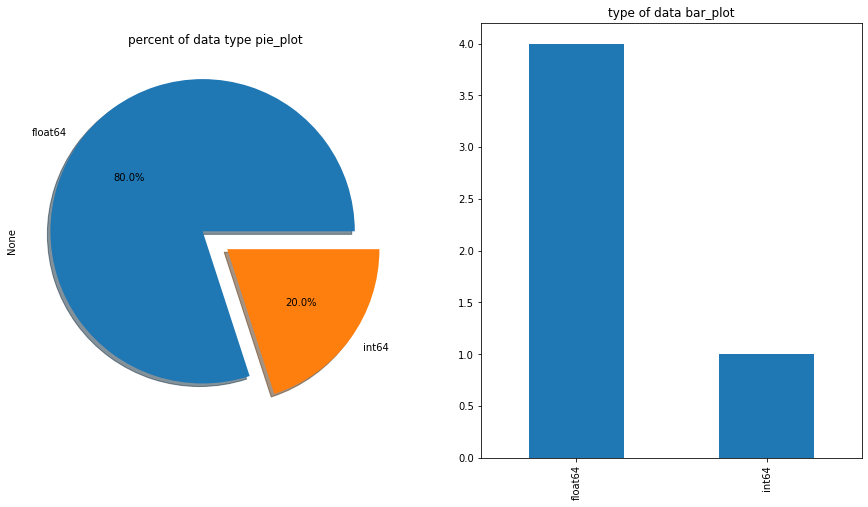

In [10]:
fig, axarr = plt.subplots(1,2,figsize=(15,8))

data.dtypes.value_counts().plot.pie(autopct='%1.1f%%',explode=[0.1,0.1],shadow=True,ax=axarr[0])
axarr[0].set_title('percent of data type pie_plot')

data.dtypes.value_counts().plot.bar(ax=axarr[1])
axarr[1].set_title('type of data bar_plot')

plt.show()

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

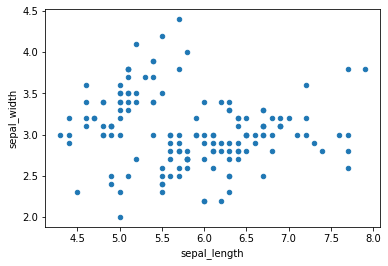

In [11]:
data.plot(kind="scatter", x="sepal_length", y="sepal_width")

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


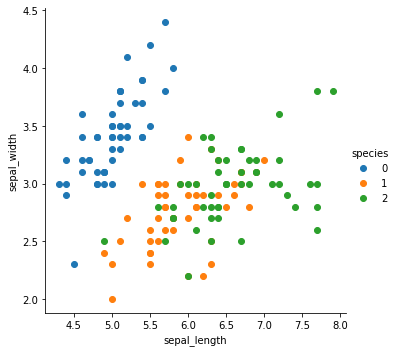

In [12]:
sns.FacetGrid(data, hue="species", size=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

<AxesSubplot:xlabel='species', ylabel='petal_length'>

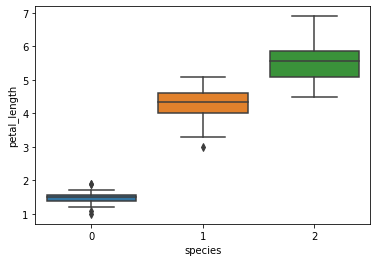

In [13]:
sns.boxplot(x="species", y="petal_length", data=data)

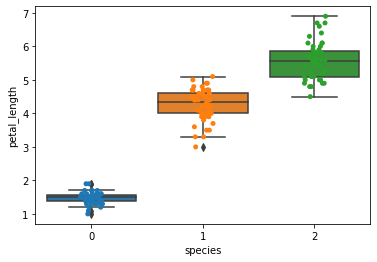

In [14]:
ax = sns.boxplot(x="species", y="petal_length", data=data)
ax = sns.stripplot(x="species", y="petal_length", data=data, jitter=True, edgecolor="gray")

<AxesSubplot:xlabel='sepal_length', ylabel='species'>

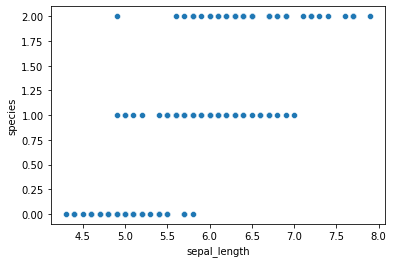

In [15]:
sns.scatterplot(x='sepal_length',y='species', data=data)

<AxesSubplot:xlabel='sepal_width', ylabel='species'>

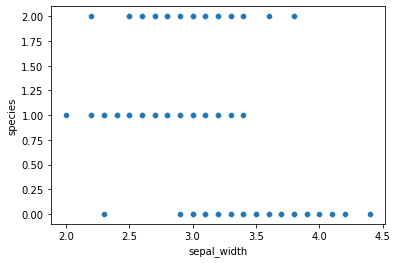

In [16]:
sns.scatterplot(x='sepal_width',y='species', data=data)

<AxesSubplot:xlabel='petal_length', ylabel='species'>

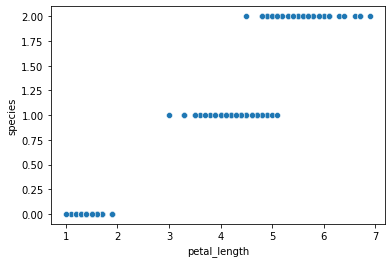

In [17]:
sns.scatterplot(x='petal_length',y='species', data=data)

<AxesSubplot:xlabel='petal_width', ylabel='species'>

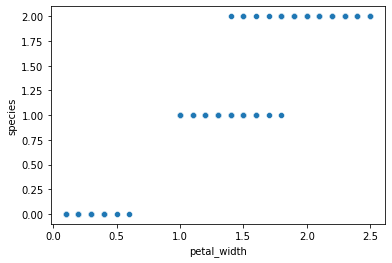

In [18]:
sns.scatterplot(x='petal_width',y='species', data=data)

<AxesSubplot:xlabel='species', ylabel='count'>

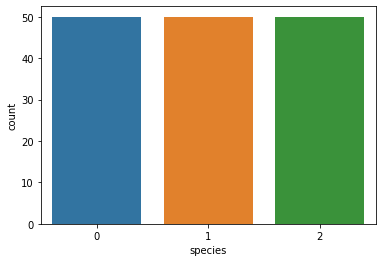

In [19]:
sns.countplot(x='species',data=data)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


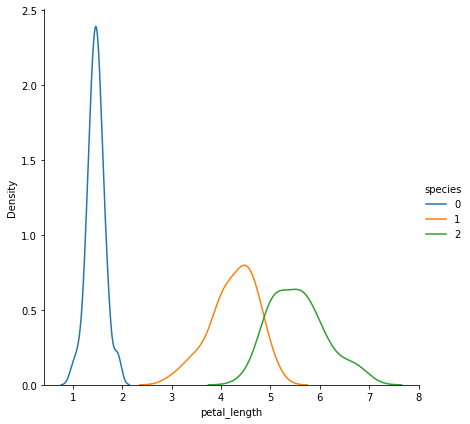

In [20]:
sns.FacetGrid(data, hue="species", size=6) \
   .map(sns.kdeplot, "petal_length") \
   .add_legend()

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>],
       [<AxesSubplot:title={'center':'species'}>, <AxesSubplot:>]],
      dtype=object)

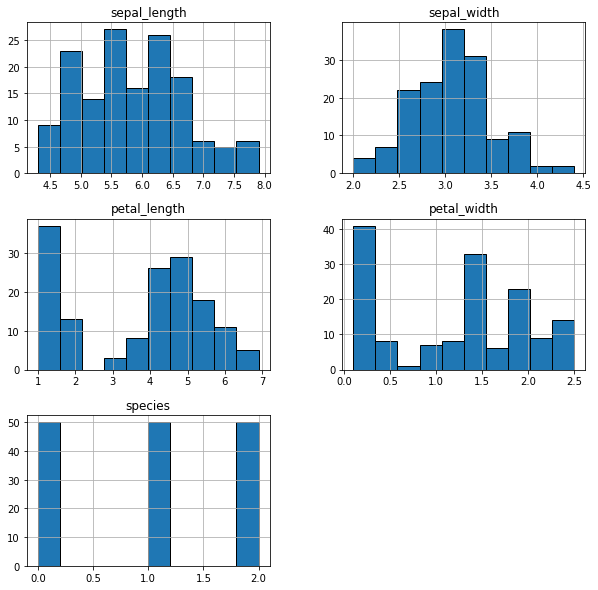

In [21]:
data.hist(edgecolor='black',figsize=(10,10))


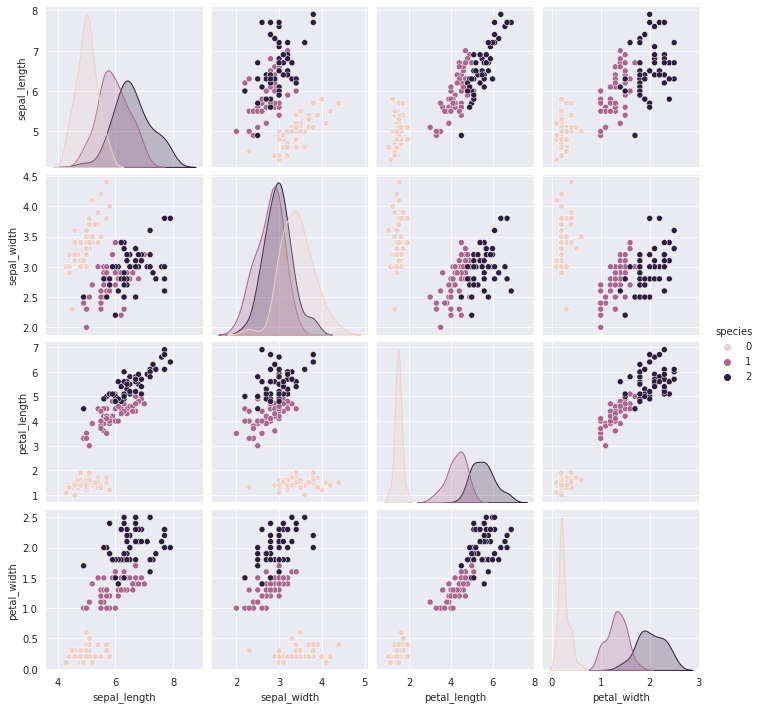

In [22]:
sns.set_style('darkgrid')
sns.pairplot(data , hue='species');

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [24]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [26]:
LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(random_state=33, solver='sag')

In [27]:
#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)
print('----------------------------------------------------')

LogisticRegressionModel Train Score is :  0.9916666666666667
LogisticRegressionModel Test Score is :  0.9666666666666667
LogisticRegressionModel Classes are :  [0 1 2]
LogisticRegressionModel No. of iteratios is :  [100]
----------------------------------------------------


In [28]:
#Calculating Prediction
y_pred = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])

Predicted Value for LogisticRegressionModel is :  [1 2 1 2 0 1 1 2 1 2]
Prediction Probabilities Value for LogisticRegressionModel is :  [[3.91991615e-02 8.92810943e-01 6.79898954e-02]
 [1.09966350e-03 2.89866239e-01 7.09034098e-01]
 [3.65720818e-02 8.06375520e-01 1.57052398e-01]
 [6.47022781e-04 1.88573101e-01 8.10779876e-01]
 [9.72591737e-01 2.74076188e-02 6.44217456e-07]
 [9.54063344e-02 8.87891579e-01 1.67020869e-02]
 [3.12803312e-02 8.34209163e-01 1.34510506e-01]
 [4.62250111e-03 3.88229489e-01 6.07148010e-01]
 [4.81213976e-02 8.92320265e-01 5.95583376e-02]
 [2.17445424e-03 3.56225964e-01 6.41599582e-01]]


In [29]:
y_test[0:10]

65     1
83     1
61     1
137    2
31     0
79     1
96     1
138    2
71     1
123    2
Name: species, dtype: int64

In [30]:
from sklearn import metrics
k_range = range(1,26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test , y_pred) )
print(scores)

[0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9, 0.9333333333333333, 0.9, 0.9333333333333333, 0.9, 0.9]


Text(0, 0.5, 'testing accuracy')

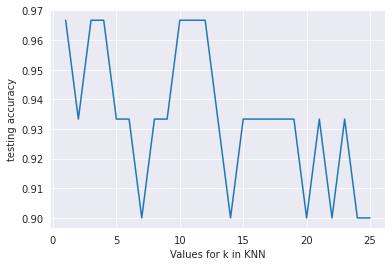

In [31]:
plt.plot(k_range , scores)
plt.xlabel('Values for k in KNN')
plt.ylabel('testing accuracy')